In [1]:
import math
import numpy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:

congress2015 = pd.read_csv("results-1512congreso.csv")
senate2015 = pd.read_csv("results-1512senado.csv")
congress2016 = pd.read_csv("results-1606congreso.csv")
senate2016 = pd.read_csv("results-1606senado.csv")

In [3]:
print(congress2015.shape)
print(senate2015.shape)
print(congress2016.shape)
print(senate2016.shape)

(67, 4)
(64, 4)
(60, 4)
(57, 4)


In [4]:
print(congress2015.head(10))
print(senate2015.head(10))
print(congress2016.head(10))
print(senate2016.head(10))

                     Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3
0          Información general:        NaN        NaN        NaN
1                Votos blancos:     978380        NaN        NaN
2                  Votos nulos:     800897        NaN        NaN
3                  Censo total:   34631581        NaN        NaN
4              Votos correctos:   24869217        NaN        NaN
5         Porcentaje escrutado:       9991        NaN        NaN
6                 Abstenciones:    9731126        NaN        NaN
7                   Escrutinio:        NaN        NaN        NaN
8                       Partido      Sigla      Votos    escaños
9  AGRUPACIÓN SOCIALISTA GOMERA        ASG       4435          1
                         Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3
0              Información general:        NaN        NaN        NaN
1                    Votos blancos:     187771        NaN        NaN
2                      Votos nulos:     226997        NaN        NaN
3        

In [5]:
columns = ["Partido","Sigla","Votos","escaños"]
c15 = congress2015[9:].copy()
c16 = congress2016[9:].copy()
s15 = senate2015[9:].copy()
s16 = senate2016[9:].copy()
c15.columns = columns
c16.columns = columns
s15.columns = columns
s16.columns = columns

print(c15.head())

                             Partido             Sigla  Votos escaños
9       AGRUPACIÓN SOCIALISTA GOMERA               ASG   4435       1
10                  BADAJOZ ADELANTE  BADAJOZ ADELANTE   4014       0
11                   BLOQUE ARAGONÉS               BAR   1179       0
12  CIUDADANOS DE CENTRO DEMOCRÁTICO               CCD  20073       0
13          CIUDADANOS LIBRES UNIDOS             CILUS   3139       0


In [6]:
c15['Votos'] = c15['Votos'].astype('int')
c16['Votos'] = c16['Votos'].astype('int')
s15['Votos'] = s15['Votos'].astype('int')
s16['Votos'] = s16['Votos'].astype('int')

c15['escaños'] = c15['escaños'].astype('int')
c16['escaños'] = c16['escaños'].astype('int')
s15['escaños'] = s15['escaños'].astype('int')
s16['escaños'] = s16['escaños'].astype('int')
c15.dtypes

Partido    object
Sigla      object
Votos       int64
escaños     int64
dtype: object

In [7]:
c15 = c15.sort_values('Votos', axis=0, ascending=True)
#s15 = s15.sort_values('Votos', axis=0, ascending=False)
c16 = c16.sort_values('Votos', axis=0, ascending=True)
#s16 = s15.sort_values('Votos', axis=0, ascending=False)

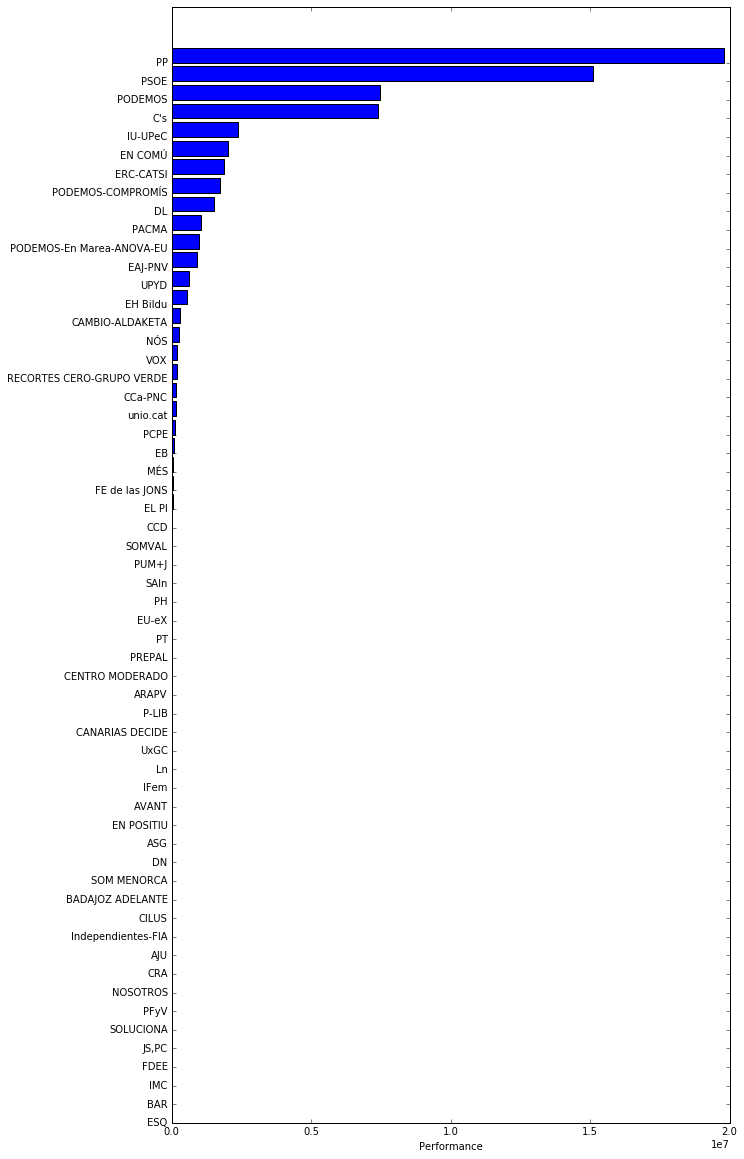

In [8]:
y_pos = numpy.arange(len(c15["Partido"]))
 
plt.figure(figsize=(10,20))

plt.barh(y_pos, c15["Votos"])
plt.yticks(y_pos, c15["Sigla"])
plt.xlabel('Performance')
#ax1.title('How fast do you want to go today?')

plt.show()


In [9]:
print(c15[c15['Sigla'] == 'SOMVAL'])

           Partido   Sigla  Votos  escaños
41  SOM VALENCIANS  SOMVAL  19891        0


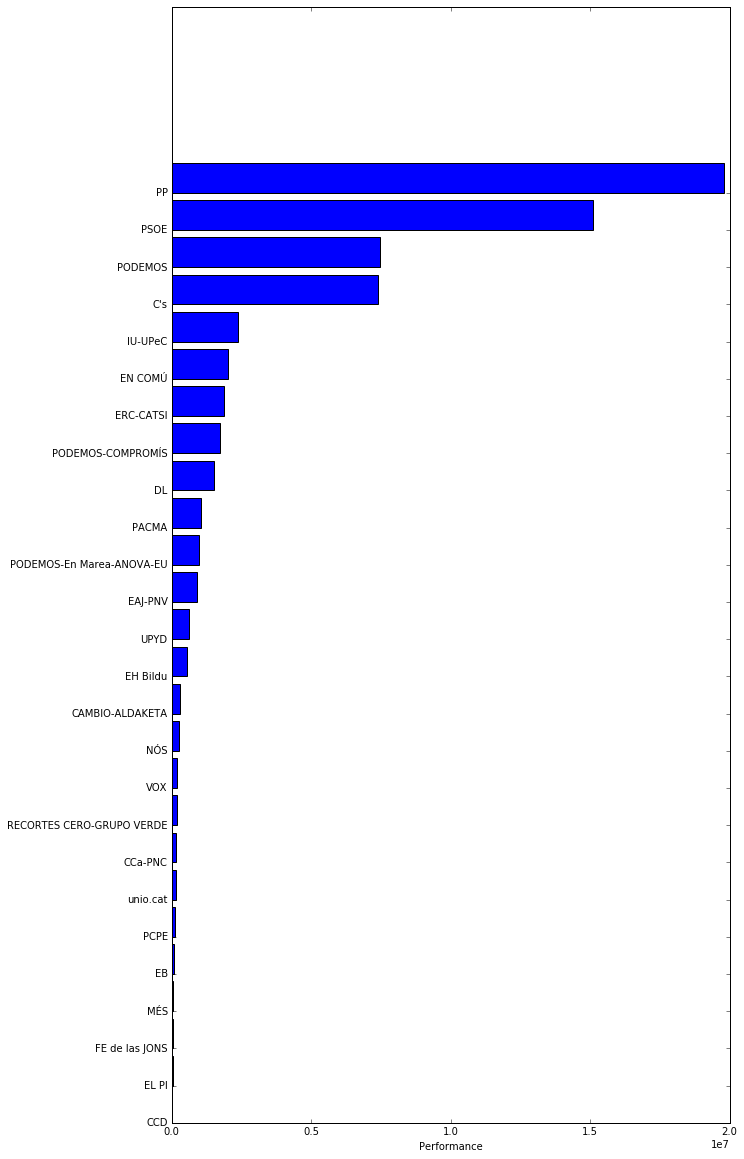

In [10]:
x_pos = c15[c15["Votos"] >= 20000]
y_pos = numpy.arange(len(x_pos))

plt.figure(figsize=(10,20))

plt.barh(y_pos, x_pos["Votos"])
plt.yticks(y_pos, x_pos["Sigla"])
plt.xlabel('Performance')
#ax1.title('How fast do you want to go today?')

plt.show()

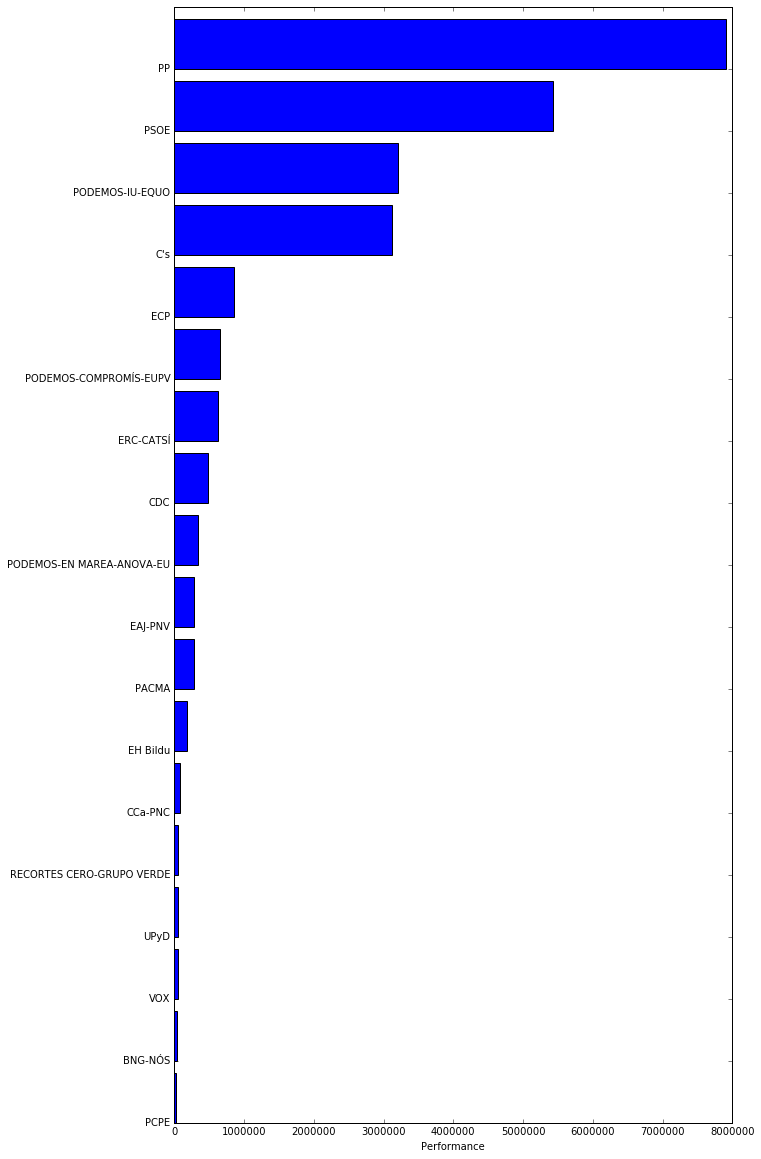

In [11]:
x_pos = c16[c16["Votos"] >= 20000]
y_pos = numpy.arange(len(x_pos))

plt.figure(figsize=(10,20))

plt.barh(y_pos, x_pos["Votos"])
plt.yticks(y_pos, x_pos["Sigla"])
plt.xlabel('Performance')
#ax1.title('How fast do you want to go today?')

plt.show()

In [12]:
len(c15[c15["Partido"] == "PODEMOS"])

1

In [13]:
c15.to_csv("congres2105.csv")

In [15]:
c15.columns = ['Partido','Sigla','Votos2015','Escannos2015']

In [16]:
c16.columns = ['Partido','Sigla','Votos2016','Escannos2016']

In [17]:
congress = pd.concat([c15,c16])

In [21]:
congress.tail()

,Escannos2015,Escannos2016,Partido,Sigla,Votos2015,Votos2016
13,NaN,12.0,EN COMÚ PODEM-GUANYEM EL CANVI,ECP,NaN,848526.0
12,NaN,32.0,CIUDADANOS-PARTIDO DE LA CIUDADANÍA,C's,NaN,3123769.0
11,NaN,45.0,UNIDOS PODEMOS,PODEMOS-IU-EQUO,NaN,3201170.0
10,NaN,85.0,PARTIDO SOCIALISTA OBRERO ESPAÑOL,PSOE,NaN,5424709.0
9,NaN,137.0,PARTIDO POPULAR,PP,NaN,7906185.0


In [45]:
c = ['Sigla','Votos2015','Escannos2015']
c15id = c15[c]
c15id = c15id.set_index('Sigla')
#c16id = c16[]
c = ['Sigla','Votos2016','Escannos2016']
c16id = c16[c]
c16id = c16id.set_index('Sigla')
#c16id = c16[]


In [77]:
congress = pd.merge(c15, c16,how='outer')

In [78]:

print(congress[['Sigla','Votos2015','Votos2016']])

                        Sigla  Votos2015  Votos2016
0                         ESQ      978.0        NaN
1                         BAR     1179.0        NaN
2                         IMC     1210.0      351.0
3                        FDEE     1212.0        NaN
4                       JS,PC     1392.0        NaN
5                   SOLUCIONA     1566.0        NaN
6                        PFyV     1568.0      838.0
7                    NOSOTROS     1581.0        NaN
8                         CRA     1606.0        NaN
9                         AJU     1815.0        NaN
10         Independientes-FIA     2697.0        NaN
11                      CILUS     3139.0      847.0
12           BADAJOZ ADELANTE     4014.0        NaN
13                SOM MENORCA     4122.0        NaN
14                         DN     4411.0        NaN
15                        ASG     4435.0        NaN
16                 EN POSITIU     4547.0        NaN
17                      AVANT     4923.0        NaN
18          

(58, 4)
(51, 4)
(89, 6)
